**DATA CLEANING AND ANALYSIS**


In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Read the data**

In [125]:
tel_df=pd.read_csv(r'C:\\Users\\rajak\\Downloads\\telecom_churn_data.csv')
tel_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


**2.Create categiricol and numerical columns**

In [127]:
cat=tel_df.select_dtypes(include='object').columns
num=tel_df.select_dtypes(exclude='object').columns


In [128]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [129]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

**3.Data quick checks A) shape B) Size C) len D) Head E) Tail F) info G) Data types**

In [131]:
tel_df.shape

(2000, 16)

In [132]:
tel_df.size

32000

In [133]:
len(tel_df)

2000

In [134]:
tel_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [135]:
tel_df.tail()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [136]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [137]:
tel_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [138]:
tel_df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [139]:
gender_mode=tel_df['gender'].mode()[0]
tel_df['gender']=tel_df['gender'].fillna(gender_mode)

In [140]:
maximu_days_mode=tel_df['maximum_days_inactive'].mode()[0]
tel_df['maximum_days_inactive']=tel_df['maximum_days_inactive'].fillna(maximu_days_mode)

In [141]:
churn_mode=tel_df['churn'].mode()[0]
tel_df['churn']=tel_df['churn'].fillna(churn_mode)

In [142]:
tel_df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [143]:
tel_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [144]:
tel_df['churn']=tel_df['churn'].astype('int')

In [145]:
tel_df['maximum_days_inactive']=tel_df['maximum_days_inactive'].astype('int')

In [146]:
tel_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive       int32
customer_support_calls      int64
churn                       int32
dtype: object

In [147]:
tel_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3,2,0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4,5,1
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4,2,0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3,1,0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5,0,0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3,3,0


**4. Missing value analysis**
- Best method for Numerical :KNN Imputer
- Draw the Distribution or box plot
- if you see lots of outliers fill with median

In [149]:
tel_df.duplicated().sum()

0

**5. Data quality check or Data Cleaning** 
- Ex: 
- (i)Some column values has some punctuations
- (ii)column is numerical data type but some where cat value available 
- (iii)Drop the duplicates
- (iv)when required change the data type also

In [151]:
cat=tel_df.select_dtypes(include='object').columns
for i in cat[1:]:
    d=tel_df[i].value_counts()
    print(d)
    print('============================')

gender
Male      1077
Female     923
Name: count, dtype: int64
multi_screen
no     1802
yes     198
Name: count, dtype: int64
mail_subscribed
no     1430
yes     570
Name: count, dtype: int64


**6.Categirical column analysis
	A)Frequency Table B)Relative Frequency C)Bar Chart D)Pie chart**

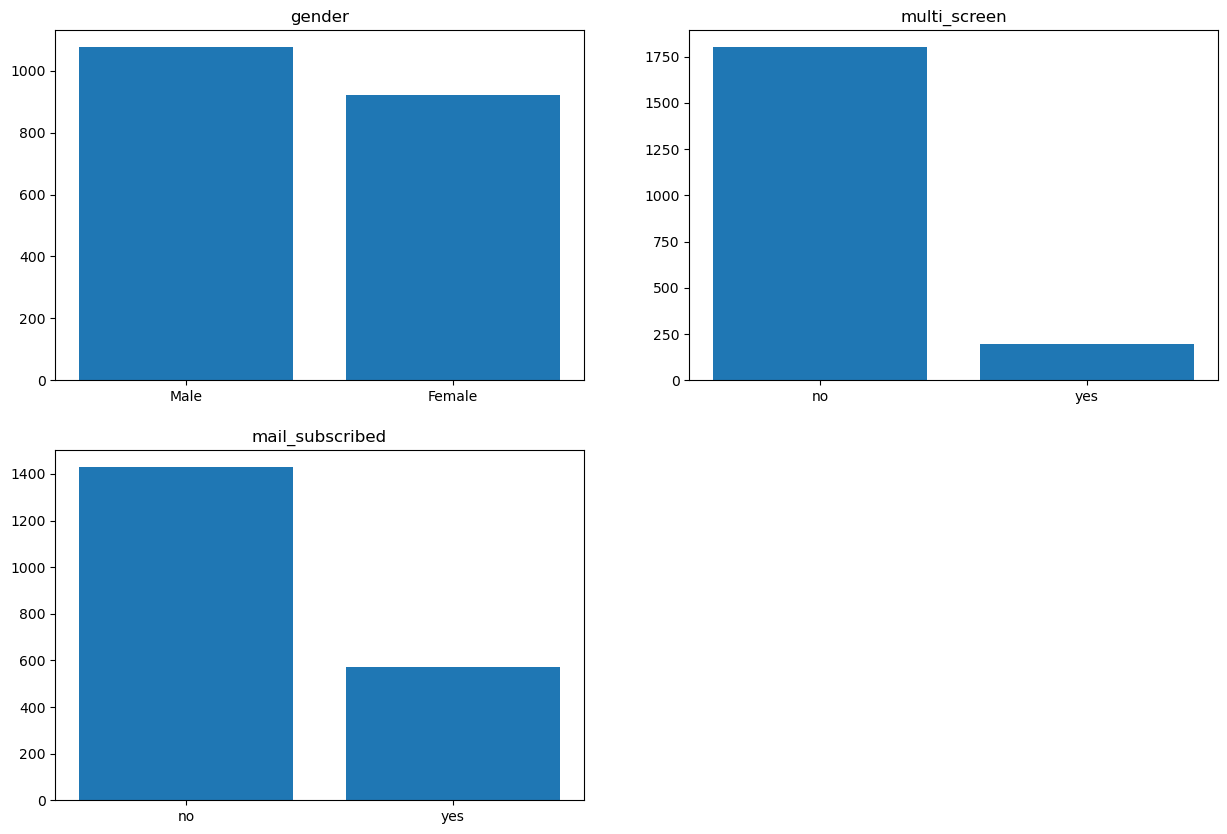

In [153]:
plt.figure(figsize=(15,10))
c=1
for i in cat[1:]:
    keys=tel_df[i].value_counts().keys()
    values=tel_df[i].value_counts().values
    plt.subplot(2,2,c).bar(keys,values)
    plt.title(i)
    c+=1
plt.show()
    

In [154]:
for i in cat[1:]:
    d=tel_df[i].value_counts(normalize=True)*100
    print(d)
    print('============================')

gender
Male      53.85
Female    46.15
Name: proportion, dtype: float64
multi_screen
no     90.1
yes     9.9
Name: proportion, dtype: float64
mail_subscribed
no     71.5
yes    28.5
Name: proportion, dtype: float64


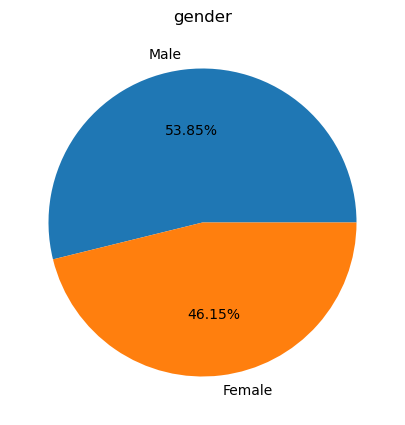

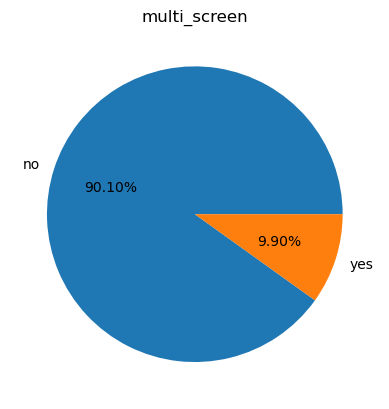

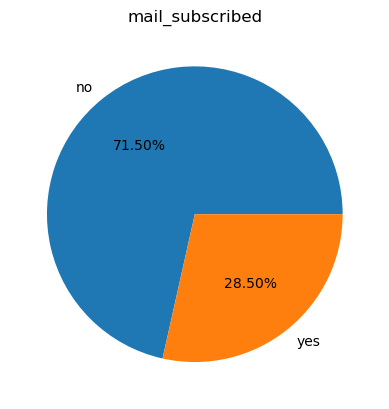

In [155]:
plt.figure(figsize=(10,5))
c=1
for i in cat[1:]:
    keys=tel_df[i].value_counts().keys()
    values=tel_df[i].value_counts().values
    plt.pie(x=values,labels=keys,autopct='%.02f%%')
    plt.title(i)
    plt.show()
    

**7.Numerical column Analysis
	A)Stastical summary B)Histogram
	Data Distribution**

In [157]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

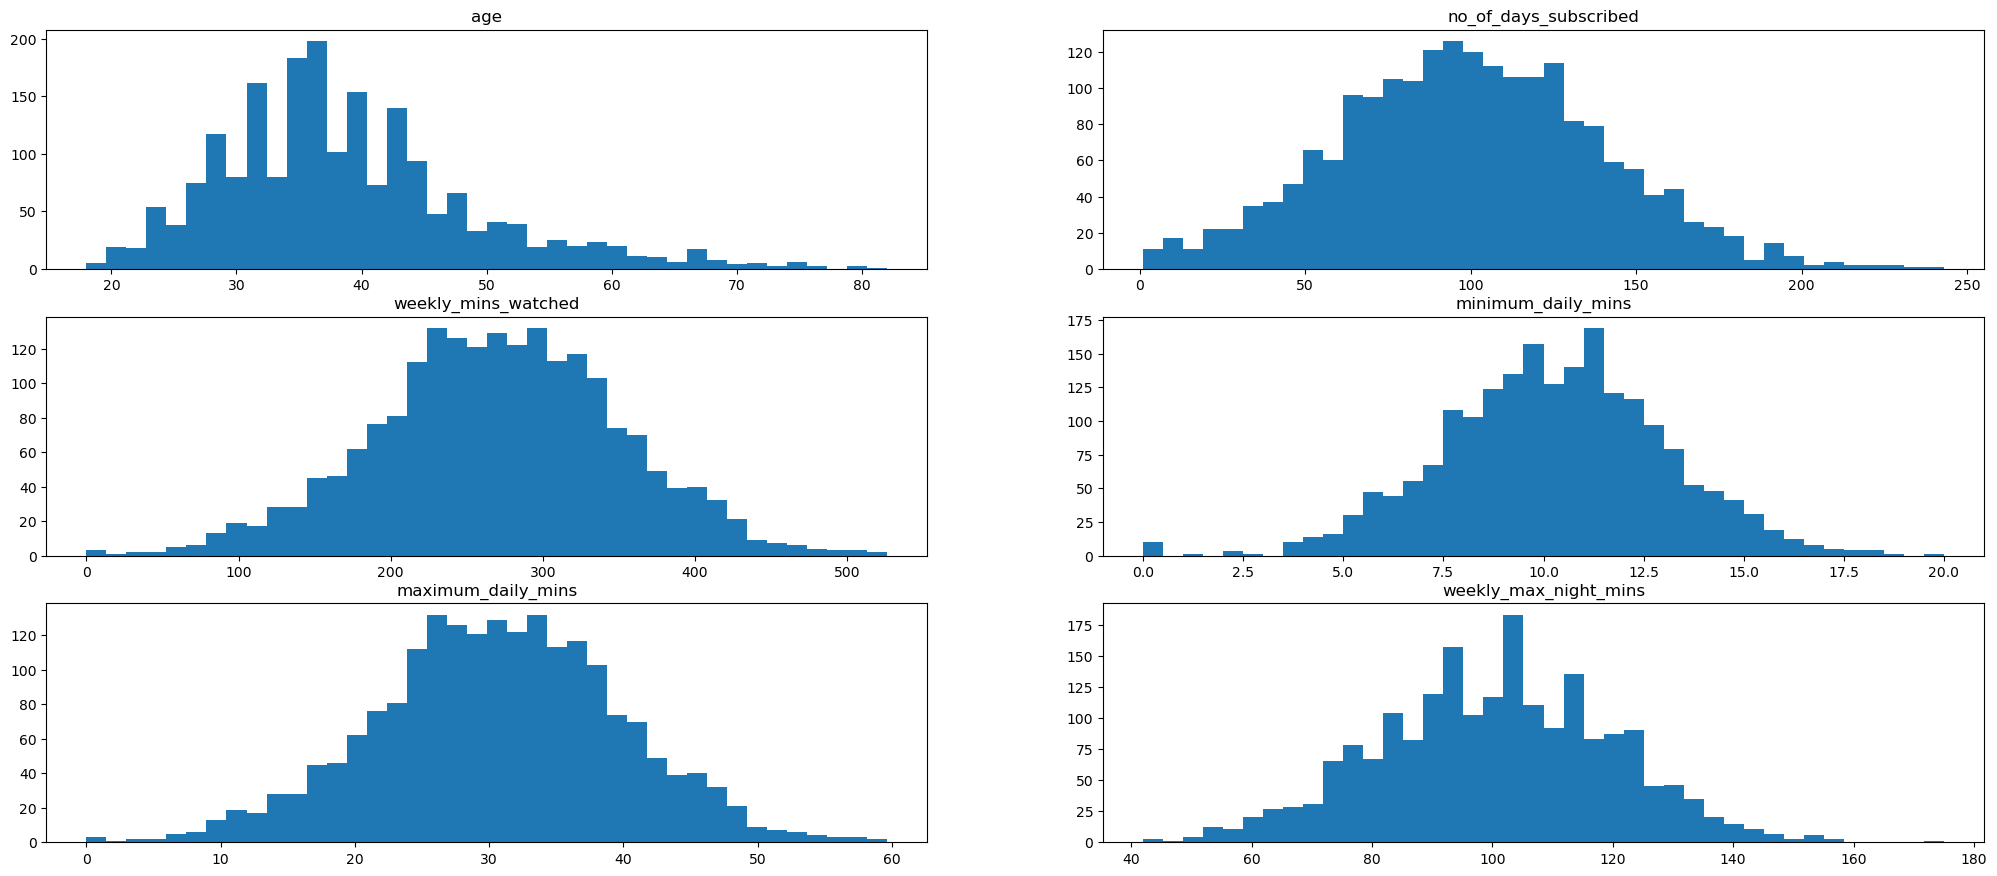

In [158]:
plt.figure(figsize=(25,18))
c=1
for i in num[2:8]:
    plt.subplot(5,2,c).hist(tel_df[i],bins=40)
    plt.title(i)
    c+=1
plt.show()

In [159]:
ls=[]
for i in num:
    d=tel_df[i]
    counts=d.count()
    minn=d.min()
    meann=d.mean()
    mediann=d.median()
    per_25=np.percentile(d,25)
    per_50=np.percentile(d,50)
    per_75=np.percentile(d,75)
    maxx=d.max()
    ls.append([counts,minn,meann,mediann,per_25,per_50,per_75,maxx])
df=pd.DataFrame(ls,columns=['counts','minn','meann','mediann','per_25','per_50','per_75','maxx'],index=num)
df

,counts,minn,meann,mediann,per_25,per_50,per_75,maxx
year,2000,2015.0,2015.000000,2015.000,2015.0000,2015.000,2015.0000,2015.00
customer_id,2000,100198.0,554887.157500,567957.500,328634.7500,567957.500,773280.2500,999961.00
age,2000,18.0,38.690500,37.000,32.0000,37.000,44.0000,82.00
no_of_days_subscribed,2000,1.0,99.750000,99.000,73.0000,99.000,127.0000,243.00
weekly_mins_watched,2000,0.0,270.178425,269.925,218.2125,269.925,324.6750,526.20
minimum_daily_mins,2000,0.0,10.198700,10.200,8.4000,10.200,12.0000,20.00
maximum_daily_mins,2000,0.0,30.620780,30.590,24.7350,30.590,36.7975,59.64
weekly_max_night_mins,2000,42.0,100.415500,101.000,87.0000,101.000,114.0000,175.00
videos_watched,2000,0.0,4.482500,4.000,3.0000,4.000,6.0000,19.00
maximum_days_inactive,2000,0.0,3.247000,3.000,3.0000,3.000,4.0000,6.00


**8.Outliers analysis**
- A)Box plot
- B)Treat the Outliers

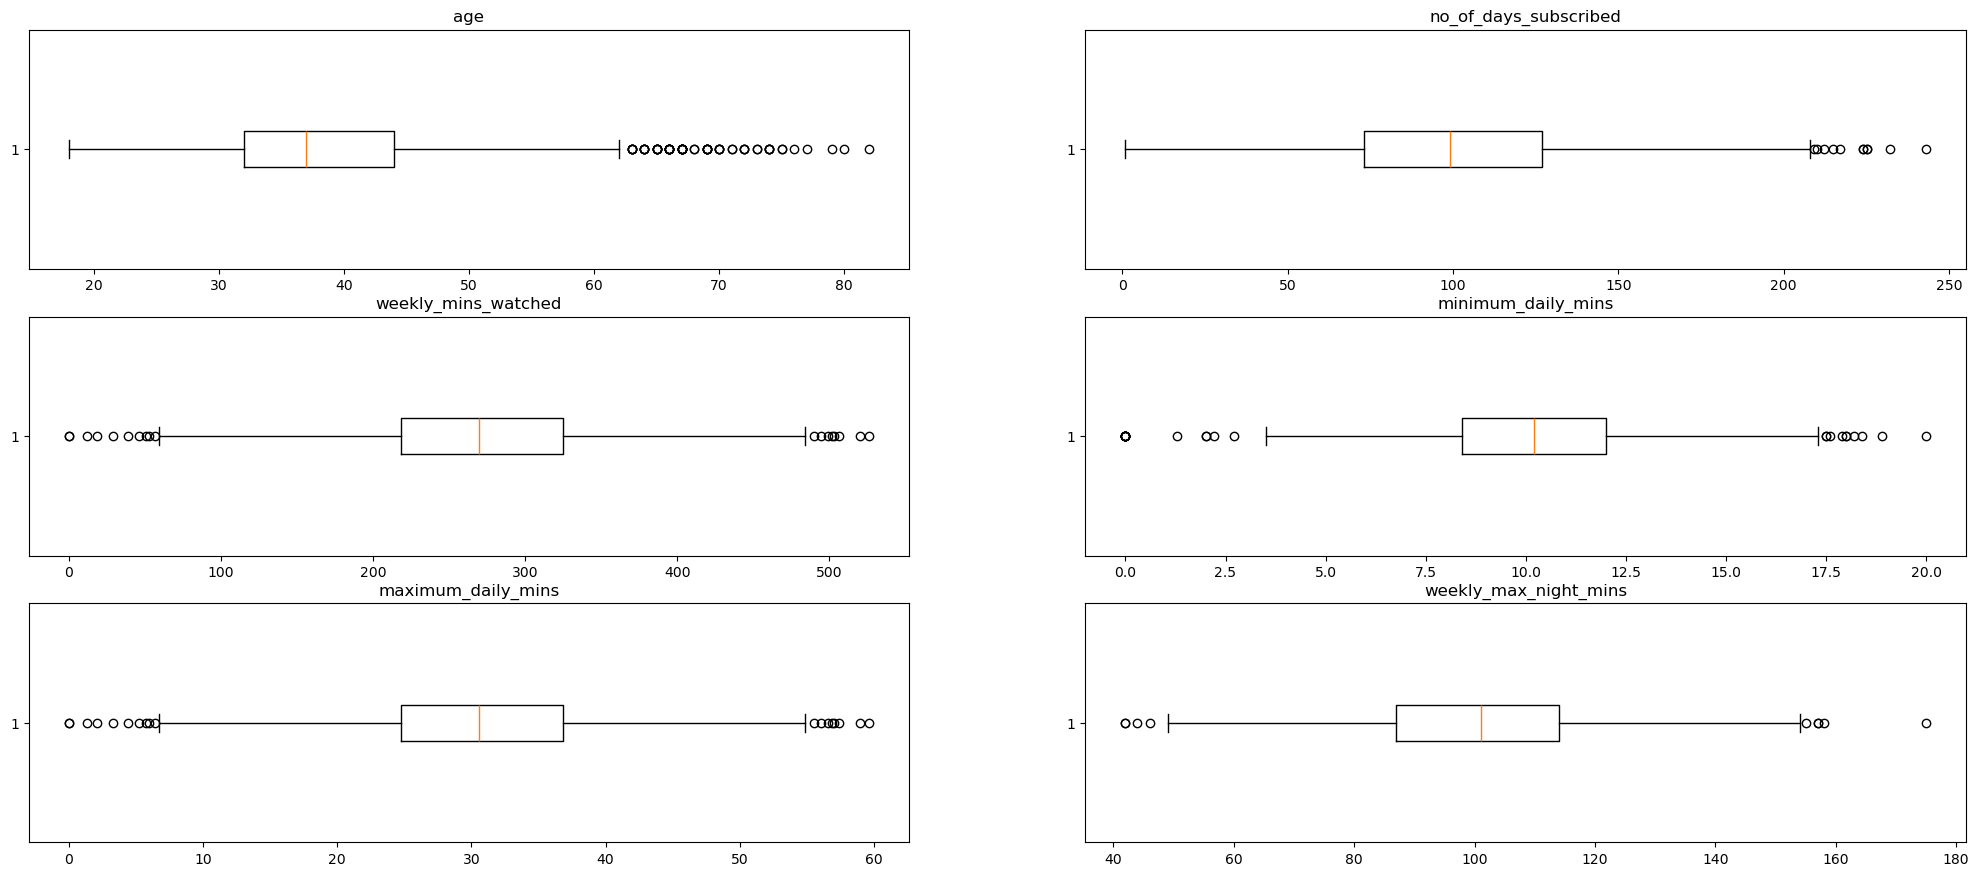

In [161]:
plt.figure(figsize=(25,18))
c=1
for i in num[2:8]:
    plt.subplot(5,2,c).boxplot(tel_df[i],vert=False)
    plt.title(i)
    c+=1
plt.show()



In [162]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [163]:
for i in num[2:]:
    d=tel_df[i]
    q1=np.percentile(d,25)
    q3=np.percentile(d,75)
    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR
    con=(d<lb)| (d>ub)
    print(len(tel_df[con]))
    




63
11
18
25
18
9
51
24
161
262


In [164]:
tel_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3,2,0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4,5,1
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4,2,0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3,1,0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5,0,0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3,3,0


In [165]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [166]:
for i in num[2:8]:
    d=tel_df[i]
    q1=np.percentile(d,25)
    q3=np.percentile(d,75)
    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR
    con=(d<lb)| (d>ub)
    median=d.median()
    tel_df[i]=np.where(con,median,d)

In [167]:
tel_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36.0,62.0,no,no,148.35,12.2,16.81,82.0,1,4,1,0
1,2015,100643,340-5930,Female,39.0,149.0,no,no,294.45,7.7,33.37,87.0,3,3,2,0
2,2015,100756,372-3750,Female,37.0,126.0,no,no,87.30,11.9,9.89,91.0,1,4,5,1
3,2015,101595,331-4902,Female,24.0,131.0,no,yes,321.30,9.5,36.41,102.0,4,3,3,0
4,2015,101653,351-8398,Female,40.0,191.0,no,no,243.00,10.9,27.54,83.0,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54.0,75.0,no,yes,182.25,11.3,20.66,97.0,5,4,2,0
1996,2015,998086,383-9255,Male,45.0,127.0,no,no,273.45,9.3,30.99,116.0,3,3,1,0
1997,2015,998474,353-2080,Male,53.0,94.0,no,no,128.85,15.6,14.60,110.0,16,5,0,0
1998,2015,998934,359-7788,Male,40.0,94.0,no,no,178.05,10.4,20.18,100.0,6,3,3,0


In [168]:
for i in num[2:]:
    d=tel_df[i]
    q1=np.percentile(d,25)
    q3=np.percentile(d,75)
    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR
    con=(d<lb)| (d>ub)
    print(len(tel_df[con]))
    

54
1
6
2
6
0
51
24
161
262


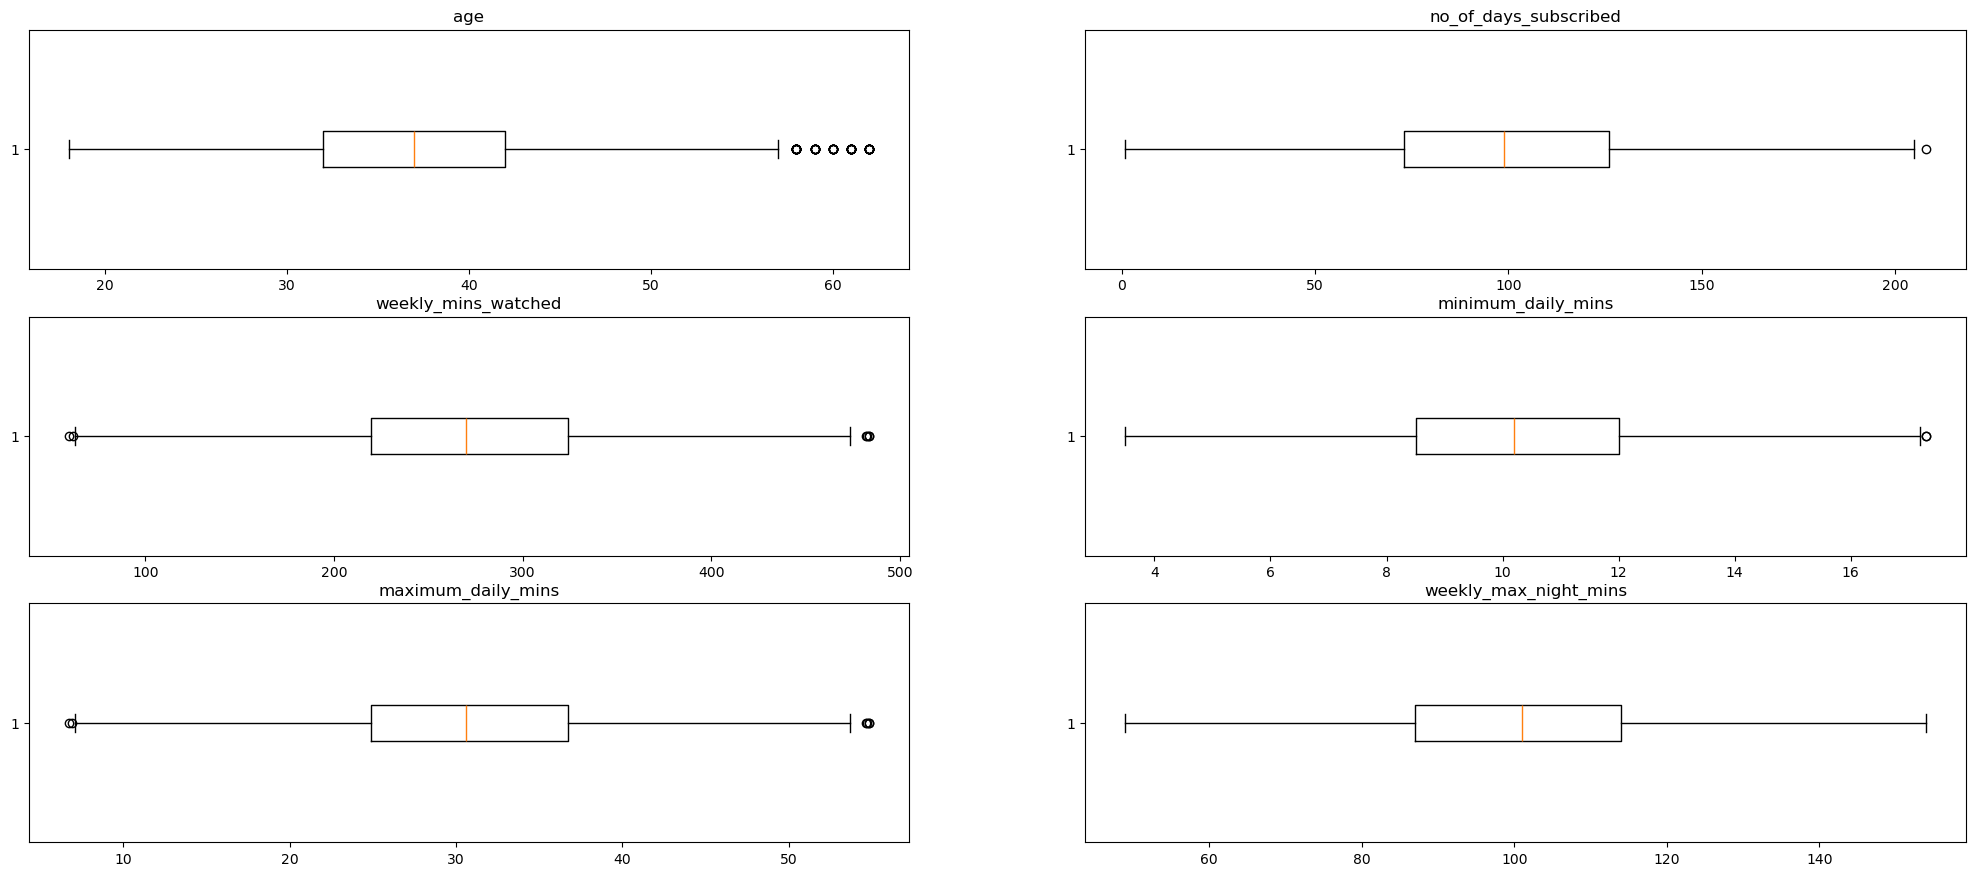

In [169]:
plt.figure(figsize=(25,18))
c=1
for i in num[2:8]:
    plt.subplot(5,2,c).boxplot(tel_df[i],vert=False)
    plt.title(i)
    c+=1
plt.show()

**9.Bi variate and multi variate analysis**
- A) How One Column Impact Another
- B) Correlation
- C)Heat Maps

<Axes: xlabel='gender'>

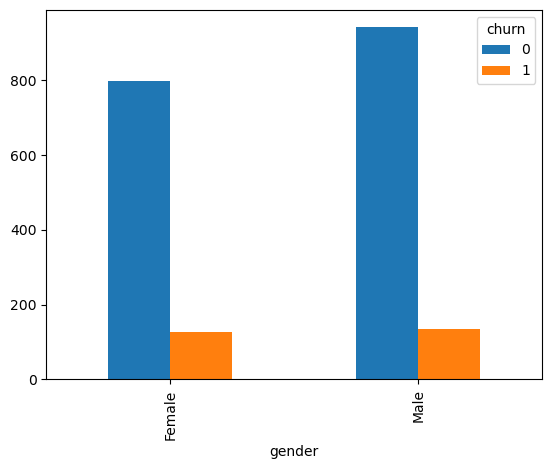

In [171]:
col1=tel_df['gender']
col2=tel_df['churn']
r1=pd.crosstab(index=col1,columns=col2)
r1.plot(kind='bar')

In [172]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

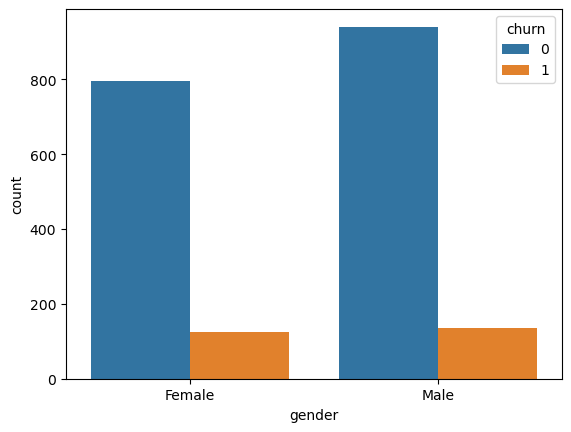

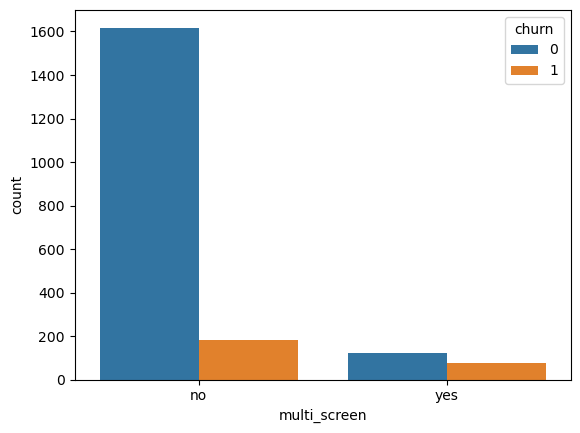

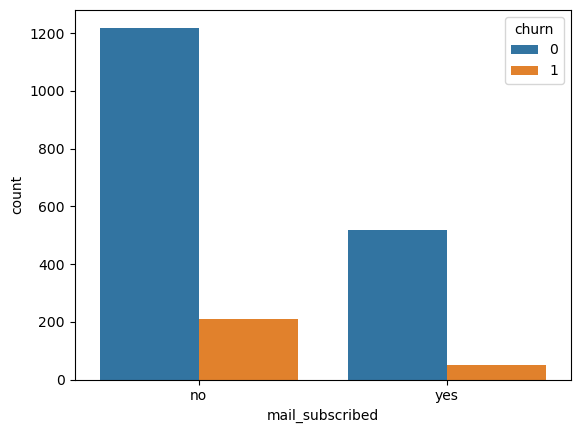

In [173]:
col2=tel_df['churn']
for i in cat[1:]:
    sns.countplot(data=tel_df,x=i,hue=col2)
    plt.show()

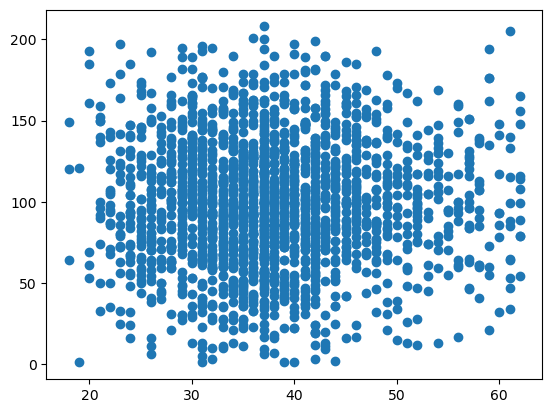

In [174]:
x=tel_df['age']
y=tel_df['no_of_days_subscribed']
plt.scatter(x,y)
plt.show()

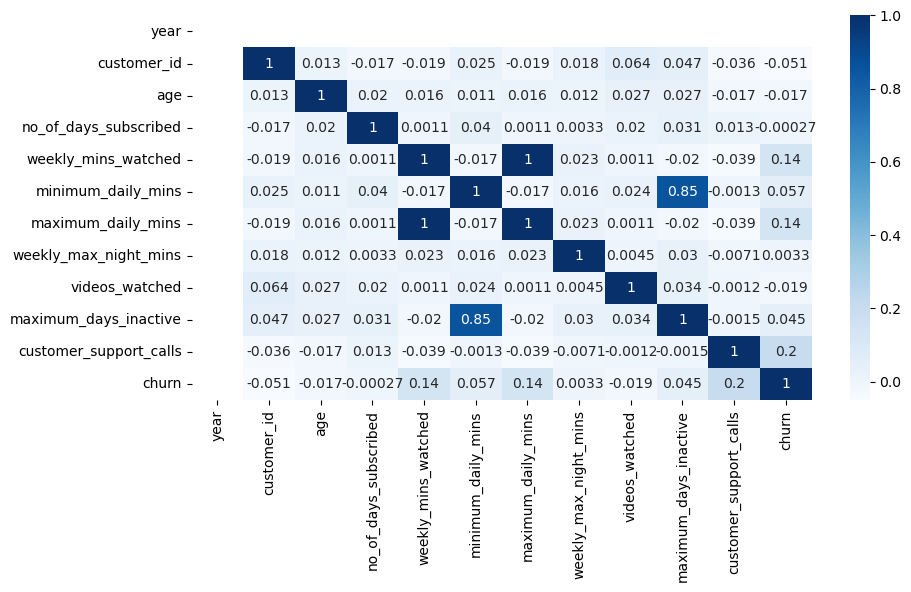

In [175]:
corr=tel_df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()


**Feature Engineering**

**10.Encoding: Convert categiricol to numerical**
- A)Label Encoder 
- B)OneHotEncoder




In [177]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [178]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [179]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat[1:]:
     tel_df[i]=le.fit_transform(tel_df[i])
tel_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0,36.0,62.0,0,0,148.35,12.2,16.81,82.0,1,4,1,0
1,2015,100643,340-5930,0,39.0,149.0,0,0,294.45,7.7,33.37,87.0,3,3,2,0
2,2015,100756,372-3750,0,37.0,126.0,0,0,87.30,11.9,9.89,91.0,1,4,5,1
3,2015,101595,331-4902,0,24.0,131.0,0,1,321.30,9.5,36.41,102.0,4,3,3,0
4,2015,101653,351-8398,0,40.0,191.0,0,0,243.00,10.9,27.54,83.0,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,0,54.0,75.0,0,1,182.25,11.3,20.66,97.0,5,4,2,0
1996,2015,998086,383-9255,1,45.0,127.0,0,0,273.45,9.3,30.99,116.0,3,3,1,0
1997,2015,998474,353-2080,1,53.0,94.0,0,0,128.85,15.6,14.60,110.0,16,5,0,0
1998,2015,998934,359-7788,1,40.0,94.0,0,0,178.05,10.4,20.18,100.0,6,3,3,0


**11. Scaling:**
- A)Standardization 
- B)Normalization

**12. Transformation(Optinol)**

In [181]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [182]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
for i in num[2:8]:
    tel_df[i]=st.fit_transform(tel_df[[i]])
tel_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0,-0.196365,-0.958187,0,0,-1.579444,0.758523,-1.579855,-0.961376,1,4,1,0
1,2015,100643,340-5930,0,0.152005,1.290199,0,0,0.310695,-0.974231,0.310522,-0.699877,3,3,2,0
2,2015,100756,372-3750,0,-0.080241,0.695798,0,0,-2.369266,0.643006,-2.369794,-0.490677,1,4,5,1
3,2015,101595,331-4902,0,-1.589844,0.825015,0,1,0.658061,-0.281130,0.657547,0.084621,4,3,3,0
4,2015,101653,351-8398,0,0.268129,2.375626,0,0,-0.354929,0.257949,-0.354991,-0.909076,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,0,1.893855,-0.622221,0,1,-1.140870,0.411972,-1.140365,-0.176878,5,4,2,0
1996,2015,998086,383-9255,1,0.848745,0.721641,0,0,0.039012,-0.358141,0.038837,0.816819,3,3,1,0
1997,2015,998474,353-2080,1,1.777732,-0.131195,0,0,-1.831721,2.067714,-1.832133,0.503020,16,5,0,0
1998,2015,998934,359-7788,1,0.268129,-0.131195,0,0,-1.195206,0.065421,-1.195158,-0.019979,6,3,3,0


In [183]:
tel_df['videos_watched'].unique()

array([ 1,  3,  4,  7,  6,  9,  5,  2,  8, 10, 14,  0, 11, 13, 18, 15, 12,
       19, 16], dtype=int64)

In [184]:
tel_df['weekly_max_night_mins'].unique()

array([-0.9613758 , -0.69987656, -0.49067717,  0.08462115, -0.90907595,
        0.55531978,  0.29382054, -0.64757672, -1.90277306, -2.21657215,
       -0.01997854, -1.11827535,  1.75821628, -0.22917793,  1.54901689,
        0.86911887,  1.23521781, -0.28147778,  0.03232131,  1.60131674,
        0.136921  , -2.63497093,  0.34612039,  1.28751765, -1.01367565,
        1.4444172 , -1.58897398,  0.45072009,  0.18922085, -1.48437428,
        0.76451918, -0.17687809, -1.37977458,  1.18291796, -0.38607748,
       -0.85677611,  0.39842024, -1.79817337, -1.27517489,  0.50301994,
       -0.12457824, -0.43837732,  1.07831826, -1.53667413, -0.75217641,
       -1.22287504,  0.97371857,  1.81051613, -0.33377763, -1.43207443,
       -1.17057519,  0.71221933, -1.69357367, -0.07227839, -0.59527687,
       -1.0659755 ,  1.39211735,  0.81681902,  1.91511583, -1.32747474,
        0.2415207 , -2.268872  ,  2.17661507,  0.65991948, -2.68727078,
        0.60761963, -0.80447626,  0.92141872, -2.05967261,  2.64